reuse rate measured

swiss 0.1

ESRB 1

australia 0.6

# testing 

At initialization, asset and liabilites are equal 
$$\alpha D + \beta D + L  = \frac{1}{1-\gamma} D$$
$$\alpha + \beta \leq \frac{1}{1-\gamma}$$

In [5]:
1/(1-(0.06))

1.0638297872340425

In [1]:
from dynamics import ClassDynamics
from network import ClassNetwork


# parameter setting
nb_banks=50
result_location="./results/single_run/test/"

# reg ratios
alpha_init=0.01  # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.5 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.5
beta_star=0.5
gamma=0.03
gamma_init = 2*gamma
collateral_value=1.0

# initialisation of deposits size
initialization_method="pareto"
alpha_pareto=1.3

# shocks on deposits 
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.01 # 0.05

# min trans size
min_repo_trans_size=1e-8  # 1e-8

# dynamics & ploting
nb_steps=int(5e3)
dump_period=int(5e2)
plot_period=int(5e2)
cp_option=True
heavy_plot=False

# LCR mgt
LCR_mgt_opt=True

# leverage mgt
end_repo_period=False # if int, periodic end repo / if false, leverage mgt
gamma_star = 1.2*gamma
# money creation
loan_tenor=5000 # if int, money creation / if false. no new loans
new_loans_vol = 0 # standard deviation around the mean creation of loans
new_loans_mean = 1e-2/250 # daily mean increase in loans expressed as a percentage of the intital loans (the other option would be a relative increase but it is unstable np.exp(np.log(1.01)/250)-1 = 4e-5)
beta_new = False # if number, new colat / if false, no new colat 
gamma_new = gamma_star + beta_reg # if number, new own funds / if false, no new own funds. we need to also add beta reg to ensure LCR can be covered with additional cash (and we still match the solvency ratio despite this excess of stress)


# initialize ClassNetwork
Network = ClassNetwork(
    nb_banks=nb_banks,
    alpha_init=alpha_init,
    beta_init=beta_init,
    beta_reg=beta_reg,
    beta_star=beta_star,
    beta_new=beta_new,
    alpha=alpha,
    gamma_init=gamma_init,
    gamma=gamma,
    gamma_star=gamma_star,
    gamma_new=gamma_new,
    collateral_value=collateral_value,
    initialization_method=initialization_method,
    alpha_pareto=alpha_pareto,
    shocks_method=shocks_method,
    shocks_law=shocks_law,
    shocks_vol=shocks_vol,
    LCR_mgt_opt=LCR_mgt_opt,
    min_repo_trans_size=min_repo_trans_size,
    loan_tenor=loan_tenor,
    new_loans_vol=new_loans_vol,
    new_loans_mean=new_loans_mean,
    end_repo_period=end_repo_period,
)

# initialize ClassDynamics
Dynamics = ClassDynamics(
    Network,
    nb_steps=nb_steps,
    path_results=result_location,
    dump_period=dump_period,
    plot_period=plot_period,
    cp_option=cp_option,
    heavy_plot=heavy_plot,
)

# simulate
Dynamics.simulate()

simulate the repo market


 10%|▉         | 499/4999 [00:39<05:48, 12.93it/s]

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 771011.76it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 993910.90it/s]


get arr_rev_repo_exp_adj


9938it [00:07, 1374.21it/s]


get arr_binary_adj (numba)


 10%|▉         | 499/4999 [00:51<05:48, 12.93it/s]

get degree distribution


100%|██████████| 500/500 [00:01<00:00, 268.11it/s]


get jaccard


100%|██████████| 499/499 [00:00<00:00, 6026.68it/s]


get density


100%|██████████| 499/499 [00:00<00:00, 4503.84it/s]


get degree stats


100%|██████████| 499/499 [00:00<00:00, 1728.60it/s]


get exposure stats


100%|██████████| 501/501 [00:00<00:00, 5088.50it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2796.87it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 432.05it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2815.61it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 430.77it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2853.33it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 427.59it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2944.36it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 421.44it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1665.93it/s]


test on day 500





100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


get transaction stats av. network


100%|██████████| 500/500 [00:00<00:00, 605.14it/s]


get transaction stats av. bank


 20%|█▉        | 999/4999 [01:51<05:53, 11.32it/s]  

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 613202.34it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 919803.51it/s]


get arr_rev_repo_exp_adj


17519it [00:19, 892.97it/s] 2:11<05:53, 11.32it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 1000/1000 [00:04<00:00, 247.85it/s]


get jaccard


100%|██████████| 999/999 [00:00<00:00, 5218.80it/s]


get density


100%|██████████| 999/999 [00:00<00:00, 5041.40it/s]


get degree stats


100%|██████████| 999/999 [00:00<00:00, 1719.15it/s]


get exposure stats


100%|██████████| 1001/1001 [00:00<00:00, 5055.35it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2912.33it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 429.85it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 446.69it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2910.93it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 436.36it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 441.69it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2879.67it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 432.47it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 439.05it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2904.42it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 424.61it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 436.44it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1692.21it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 438.86it/s]


test on day 1000





100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


get transaction stats av. network


100%|██████████| 1000/1000 [00:02<00:00, 421.95it/s]


get transaction stats av. bank


 30%|██▉       | 1499/4999 [03:31<05:12, 11.19it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 680893.51it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 859488.52it/s]


get arr_rev_repo_exp_adj


26913it [00:34, 770.94it/s] 03:41<05:12, 11.19it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 1500/1500 [00:05<00:00, 262.75it/s]


get jaccard


100%|██████████| 1499/1499 [00:00<00:00, 5111.42it/s]


get density


100%|██████████| 1499/1499 [00:00<00:00, 5022.16it/s]


get degree stats


100%|██████████| 1499/1499 [00:00<00:00, 1712.11it/s]


get exposure stats


100%|██████████| 1501/1501 [00:00<00:00, 4963.94it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2817.81it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 431.77it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 446.47it/s]


test on day 1500






100%|██████████| 100/100 [00:00<00:00, 126.07it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2913.03it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 435.39it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 439.54it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 433.94it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2832.90it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 427.00it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 424.32it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 427.58it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2811.97it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 417.80it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 428.46it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 424.43it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1669.46it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 432.00it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 437.26it/s]


test on day 1500





100%|██████████| 5/5 [00:04<00:00,  1.14it/s]


get transaction stats av. network


100%|██████████| 1500/1500 [00:04<00:00, 313.69it/s]


get transaction stats av. bank


 40%|███▉      | 1999/4999 [05:38<03:46, 13.26it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 680893.51it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 842229.72it/s]


get arr_rev_repo_exp_adj


33821it [00:51, 653.36it/s] 05:53<03:46, 13.26it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 2000/2000 [00:08<00:00, 234.24it/s]


get jaccard


100%|██████████| 1999/1999 [00:00<00:00, 4985.61it/s]


get density


100%|██████████| 1999/1999 [00:00<00:00, 5064.28it/s]


get degree stats


100%|██████████| 1999/1999 [00:01<00:00, 1706.96it/s]


get exposure stats


100%|██████████| 2001/2001 [00:00<00:00, 5010.17it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2855.05it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 424.35it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 443.36it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 439.12it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 442.80it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2894.12it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 431.76it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 437.51it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.07it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 440.84it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2890.93it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 426.20it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 435.37it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 430.84it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 441.39it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2854.71it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 420.44it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 433.18it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 429.09it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 437.14it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1668.56it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 433.81it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 442.44it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 437.50it/s]


test on day 2000





100%|██████████| 5/5 [00:04<00:00,  1.00it/s]


get transaction stats av. network


100%|██████████| 2000/2000 [00:07<00:00, 267.06it/s]


get transaction stats av. bank


 50%|████▉     | 2498/4999 [08:16<03:40, 11.32it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 816012.45it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 948937.56it/s]


get arr_rev_repo_exp_adj


41654it [01:09, 598.08it/s] 08:29<03:40, 11.32it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 2500/2500 [00:09<00:00, 258.03it/s]


get jaccard


100%|██████████| 2499/2499 [00:00<00:00, 4950.01it/s]


get density


100%|██████████| 2499/2499 [00:00<00:00, 5071.97it/s]


get degree stats


100%|██████████| 2499/2499 [00:01<00:00, 1724.27it/s]


get exposure stats


100%|██████████| 2501/2501 [00:00<00:00, 5048.94it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2816.56it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 427.48it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 443.58it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 440.00it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 444.67it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 438.23it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2870.08it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 433.77it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 436.02it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 433.88it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.58it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 434.29it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2848.21it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 430.58it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 435.58it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.38it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 439.54it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 433.92it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2816.80it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 422.52it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 432.08it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 427.92it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 436.13it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 430.84it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1669.61it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 434.95it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 439.40it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 435.99it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 440.63it/s]


test on day 2500





100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


get transaction stats av. network


100%|██████████| 2500/2500 [00:10<00:00, 234.18it/s]


get transaction stats av. bank


 60%|█████▉    | 2999/4999 [11:28<02:52, 11.62it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 620459.17it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 900065.24it/s]


get arr_rev_repo_exp_adj


48926it [01:30, 541.24it/s][11:38<02:52, 11.62it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 3000/3000 [00:11<00:00, 257.49it/s]


get jaccard


100%|██████████| 2999/2999 [00:00<00:00, 4902.68it/s]


get density


100%|██████████| 2999/2999 [00:00<00:00, 5051.15it/s]


get degree stats


100%|██████████| 2999/2999 [00:01<00:00, 1711.11it/s]


get exposure stats


100%|██████████| 3001/3001 [00:00<00:00, 5008.97it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2829.25it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 422.38it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 446.84it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 444.71it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 446.97it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.75it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.09it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2868.00it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 434.36it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 439.19it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 435.84it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.84it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.26it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.08it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2875.55it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 428.31it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 438.77it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.09it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 442.88it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 434.80it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 437.73it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 3021.59it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 423.73it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 435.69it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 429.28it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 437.93it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 432.14it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 433.79it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1648.04it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 436.28it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 441.29it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 439.24it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 434.83it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 435.28it/s]


test on day 3000





100%|██████████| 5/5 [00:07<00:00,  1.47s/it]


get transaction stats av. network


100%|██████████| 3000/3000 [00:14<00:00, 208.46it/s]


get transaction stats av. bank


 70%|██████▉   | 3499/4999 [15:18<02:04, 12.08it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 773856.83it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 915786.90it/s]


get arr_rev_repo_exp_adj


55461it [01:53, 488.18it/s] 15:34<02:04, 12.08it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 3500/3500 [00:14<00:00, 243.40it/s]


get jaccard


100%|██████████| 3499/3499 [00:00<00:00, 4651.62it/s]


get density


100%|██████████| 3499/3499 [00:00<00:00, 5018.60it/s]


get degree stats


100%|██████████| 3499/3499 [00:02<00:00, 1700.60it/s]


get exposure stats


100%|██████████| 3501/3501 [00:00<00:00, 4908.92it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2775.02it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 410.58it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 431.41it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 427.15it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 429.57it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 423.26it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 430.45it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 422.76it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2786.69it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 419.91it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 423.06it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 412.49it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 415.22it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 408.63it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 410.69it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 409.26it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2822.39it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 404.22it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 405.34it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 412.70it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 434.21it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 430.77it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 431.14it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 436.29it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2783.58it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 419.96it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 431.33it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 426.72it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 433.90it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 432.21it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 430.29it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 439.38it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1670.19it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 433.01it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 439.26it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.61it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 436.67it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 435.89it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 435.64it/s]


test on day 3500





100%|██████████| 5/5 [00:08<00:00,  1.80s/it]


get transaction stats av. network


100%|██████████| 3500/3500 [00:19<00:00, 184.18it/s]


get transaction stats av. bank


 80%|███████▉  | 3999/4999 [19:49<01:28, 11.34it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 757094.58it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 800439.69it/s]


get arr_rev_repo_exp_adj


62598it [02:17, 454.40it/s][20:09<01:28, 11.34it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 4000/4000 [00:17<00:00, 225.99it/s]


get jaccard


100%|██████████| 3999/3999 [00:00<00:00, 4896.12it/s]


get density


100%|██████████| 3999/3999 [00:00<00:00, 5009.78it/s]


get degree stats


100%|██████████| 3999/3999 [00:02<00:00, 1708.18it/s]


get exposure stats


100%|██████████| 4001/4001 [00:00<00:00, 5020.34it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2821.45it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 426.44it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 441.52it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 444.17it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 447.38it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 442.39it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.06it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 445.00it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.63it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2873.46it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 434.71it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 439.32it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 436.50it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 442.79it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.79it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.58it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 440.52it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 437.57it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2854.80it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 429.81it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 439.25it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 434.69it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.26it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 436.33it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.16it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 442.69it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.39it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2909.76it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 424.32it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 436.36it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.26it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 440.79it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 435.22it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 436.50it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 441.68it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 438.83it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1689.86it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 433.75it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 442.06it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 439.16it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 444.25it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 436.22it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.19it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 435.70it/s]


test on day 4000





100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


get transaction stats av. network


100%|██████████| 4000/4000 [00:23<00:00, 170.66it/s]


get transaction stats av. bank


 90%|████████▉ | 4499/4999 [24:58<00:38, 13.01it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 776722.96it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 923855.51it/s]


get arr_rev_repo_exp_adj


67964it [02:41, 419.60it/s][25:09<00:38, 13.01it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 4500/4500 [00:17<00:00, 256.64it/s]


get jaccard


100%|██████████| 4499/4499 [00:00<00:00, 4877.69it/s]


get density


100%|██████████| 4499/4499 [00:00<00:00, 5073.35it/s]


get degree stats


100%|██████████| 4499/4499 [00:02<00:00, 1714.52it/s]


get exposure stats


100%|██████████| 4501/4501 [00:00<00:00, 5040.46it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2867.88it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 431.43it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 444.96it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 441.66it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 446.19it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.91it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 422.39it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 442.96it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 438.65it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.61it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2908.03it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 433.32it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 440.05it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 434.39it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 441.80it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 434.92it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 438.27it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 441.41it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 435.85it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 440.80it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2850.05it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 430.29it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 435.85it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.14it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 441.47it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 434.52it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 436.90it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 438.23it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 433.93it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 439.24it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2823.50it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 421.72it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 433.95it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 430.06it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 436.92it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 433.34it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 434.50it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 437.30it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 434.92it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 435.37it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1660.45it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 434.57it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 440.62it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 438.11it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 441.15it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.46it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.33it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 439.61it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 437.48it/s]


test on day 4500





100%|██████████| 5/5 [00:10<00:00,  2.18s/it]


get transaction stats av. network


100%|██████████| 4500/4500 [00:28<00:00, 158.72it/s]


get transaction stats av. bank


100%|██████████| 4999/4999 [30:49<00:00,  2.70it/s]  


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 659481.76it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 723155.86it/s]


get arr_rev_repo_exp_adj


72296it [03:07, 384.88it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 4999/4999 [00:22<00:00, 217.85it/s]


get jaccard


100%|██████████| 4998/4998 [00:01<00:00, 4910.28it/s]


get density


100%|██████████| 4998/4998 [00:00<00:00, 5149.07it/s]


get degree stats


100%|██████████| 4998/4998 [00:02<00:00, 1730.57it/s]


get exposure stats


100%|██████████| 5000/5000 [00:00<00:00, 5054.63it/s]


run core-periphery tests


  0%|          | 0/5 [00:00<?, ?it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2851.93it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 429.61it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 444.38it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 441.49it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 444.31it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 438.89it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 444.36it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 440.75it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 437.52it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 441.48it/s]


test on day 4999


 20%|██        | 1/5 [00:02<00:09,  2.41s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2837.79it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 434.01it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 440.39it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 434.87it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 443.93it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 436.86it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 441.71it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 441.56it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 434.45it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 440.19it/s]


test on day 4999


 40%|████      | 2/5 [00:04<00:07,  2.40s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2862.42it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 430.64it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 436.64it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 431.30it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 441.86it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 429.33it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 437.06it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 440.13it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 432.59it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 439.83it/s]


test on day 4999


 60%|██████    | 3/5 [00:07<00:04,  2.41s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2859.53it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 423.94it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 433.56it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 431.83it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 440.07it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 435.22it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 433.51it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 442.28it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 435.95it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 437.37it/s]


test on day 4999


 80%|████████  | 4/5 [00:09<00:02,  2.41s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 1667.31it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 438.66it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 441.86it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 439.67it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 444.22it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 439.92it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 443.78it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 441.41it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 434.71it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 441.12it/s]


test on day 4999


100%|██████████| 5/5 [00:12<00:00,  2.41s/it]


get transaction stats av. network


100%|██████████| 4999/4999 [00:32<00:00, 153.90it/s]


get transaction stats av. bank


100%|██████████| 4999/4999 [00:04<00:00, 1035.52it/s]


In [5]:
import numpy as np
np.exp(np.log(1.01)/250)-1

3.980211549592383e-05

(array([36.,  7.,  3.,  0.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([0.22896693, 0.83264029, 1.43631366, 2.03998702, 2.64366039,
        3.24733375, 3.85100712, 4.45468048, 5.05835385, 5.66202721,
        6.26570058]),
 <BarContainer object of 10 artists>)

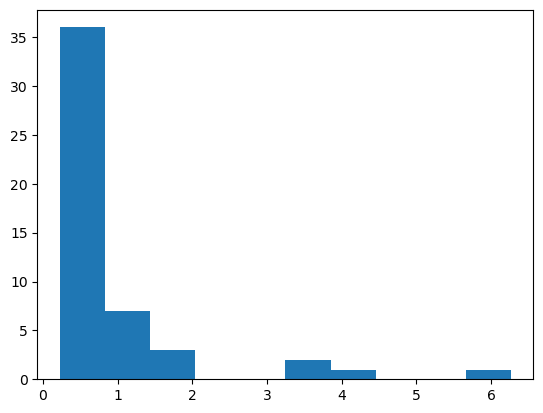

In [5]:
import numpy as np
from matplotlib import pyplot as plt
ar_new_loans = (np.random.randn(nb_banks) * new_loans_vol + 1)*new_loans_mean
plt.hist(ar_new_loans*Network.df_banks["initial loans"])

In [2]:
# get graphics after interupting 
import graphics  as gx
Dynamics.nb_steps = Network.step
Dynamics.plot_period = Network.step
Dynamics.fill()
Dynamics.dump()
gx.plot(Dynamics)

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 720670.79it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 970903.70it/s]


get arr_rev_repo_exp_adj


6947it [00:00, 8465.61it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 359/359 [00:00<00:00, 725.44it/s]


get jaccard


100%|██████████| 358/358 [00:00<00:00, 6766.38it/s]


get density


100%|██████████| 358/358 [00:00<00:00, 4538.82it/s]


get degree stats


100%|██████████| 358/358 [00:00<00:00, 1734.92it/s]


get exposure stats


100%|██████████| 360/360 [00:00<00:00, 5262.76it/s]


run core-periphery tests


  0%|          | 0/5 [00:00<?, ?it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2807.49it/s]


test on day 359


 20%|██        | 1/5 [00:00<00:00,  6.72it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2814.52it/s]


test on day 359


 40%|████      | 2/5 [00:00<00:00,  7.51it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2826.39it/s]


test on day 359


 60%|██████    | 3/5 [00:00<00:00,  7.67it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2827.55it/s]


test on day 359


 80%|████████  | 4/5 [00:00<00:00,  7.40it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 1876.26it/s]


test on day 359


100%|██████████| 5/5 [00:00<00:00,  7.40it/s]


get transaction stats av. network


100%|██████████| 359/359 [00:00<00:00, 561.60it/s]


get transaction stats av. bank


100%|██████████| 359/359 [00:00<00:00, 1172.51it/s]


# analysis

In [3]:
import numpy as np 
for chain in Network.chains_rev_repo:
   if  len(np.unique (np.array(chain))) < len(np.array(chain)):
      print("error")

In [4]:
len(Network.chains_rev_repo)

871161

In [8]:
Network.loops_rev_repo

[[22, 24],
 [47, 22],
 [30, 11, 27],
 [21, 40],
 [6, 40, 11],
 [41, 40, 10],
 [41, 40, 30, 11, 10],
 [41, 40, 11, 10],
 [5, 40, 30, 11, 27, 48, 21],
 [5, 40, 11, 27, 48, 21],
 [5, 40, 21],
 [5, 48, 21],
 [5, 48, 19, 35, 21],
 [33, 10],
 [11, 19, 35, 22, 36, 30],
 [11, 6, 40, 30],
 [11, 6, 22, 36, 30],
 [11, 27, 30],
 [11, 47, 22, 36, 30],
 [0, 48, 19, 35, 22],
 [0, 48, 19, 35],
 [21, 5, 48, 19, 35],
 [10, 33],
 [16, 27, 48],
 [19, 35, 22],
 [22, 36, 30, 11, 6],
 [22, 0, 48, 21, 40, 11, 6],
 [22, 24, 40, 11, 6],
 [22, 0, 21, 40, 11, 6],
 [22, 16, 27, 30, 11, 6],
 [22, 36, 30, 11, 27, 48, 21, 5],
 [22, 0, 48, 21, 5],
 [22, 0, 48, 19, 35, 21, 5],
 [22, 16, 27, 48, 21, 5],
 [22, 24, 40, 21, 5],
 [22, 0, 21, 5],
 [22, 19, 35, 21, 5],
 [22, 47],
 [22, 36, 30, 11, 47],
 [22, 0, 48, 21, 40, 11, 47],
 [22, 24, 40, 11, 47],
 [22, 0, 21, 40, 11, 47],
 [22, 16, 27, 30, 11, 47],
 [48, 16, 27],
 [10, 41, 40, 30, 11],
 [10, 41, 40, 11],
 [25, 48, 38],
 [25, 5, 48, 38],
 [25, 5, 40, 30, 11, 27, 48, 38

In [5]:
Network.loops_rev_repo

[[22, 24],
 [47, 22],
 [30, 11, 27],
 [21, 40],
 [6, 40, 11],
 [41, 40, 10],
 [41, 40, 30, 11, 10],
 [41, 40, 11, 10],
 [5, 40, 30, 11, 27, 48, 21],
 [5, 40, 11, 27, 48, 21],
 [5, 40, 21],
 [5, 48, 21],
 [5, 48, 19, 35, 21],
 [33, 10],
 [11, 19, 35, 22, 36, 30],
 [11, 6, 40, 30],
 [11, 6, 22, 36, 30],
 [11, 27, 30],
 [11, 47, 22, 36, 30],
 [0, 48, 19, 35, 22],
 [0, 48, 19, 35],
 [21, 5, 48, 19, 35],
 [10, 33],
 [16, 27, 48],
 [19, 35, 22],
 [22, 36, 30, 11, 6],
 [22, 0, 48, 21, 40, 11, 6],
 [22, 24, 40, 11, 6],
 [22, 0, 21, 40, 11, 6],
 [22, 16, 27, 30, 11, 6],
 [22, 36, 30, 11, 27, 48, 21, 5],
 [22, 0, 48, 21, 5],
 [22, 0, 48, 19, 35, 21, 5],
 [22, 16, 27, 48, 21, 5],
 [22, 24, 40, 21, 5],
 [22, 0, 21, 5],
 [22, 19, 35, 21, 5],
 [22, 47],
 [22, 36, 30, 11, 47],
 [22, 0, 48, 21, 40, 11, 47],
 [22, 24, 40, 11, 47],
 [22, 0, 21, 40, 11, 47],
 [22, 16, 27, 30, 11, 47],
 [48, 16, 27],
 [10, 41, 40, 30, 11],
 [10, 41, 40, 11],
 [25, 48, 38],
 [25, 5, 48, 38],
 [25, 5, 40, 30, 11, 27, 48, 38

In [6]:
max = 0 
min = 19
sum = 0
for chain in Network.chains_rev_repo:
   if  len(chain) > max:
      max = len(chain)
   if  len(chain) < min:
      min = len(chain)
   sum +=len(chain)

print(max)
print(min)
print(sum/len(Network.chains_rev_repo))

18
2
9.411325805448131


In [7]:
selected_chains = []
for chain in Network.chains_rev_repo:
    if 44 in chain[1:]:
        selected_chains.append(chain)
selected_chains

[[42, 15, 25, 14, 47, 22, 44],
 [42, 15, 25, 47, 22, 44],
 [42, 15, 3, 22, 44],
 [42, 15, 3, 22, 44],
 [42, 15, 24, 33, 10, 3, 22, 44],
 [23, 45, 1, 33, 2, 44],
 [42, 15, 25, 45, 1, 33, 2, 44],
 [42, 15, 25, 45, 21, 5, 22, 44],
 [42, 15, 25, 11, 6, 3, 22, 44],
 [42, 15, 4, 22, 44],
 [42, 15, 25, 45, 1, 33, 2, 44],
 [42, 15, 25, 45, 21, 5, 22, 44],
 [42, 15, 25, 11, 6, 3, 22, 44],
 [42, 15, 25, 11, 6, 3, 22, 44],
 [42, 15, 25, 5, 22, 44],
 [42, 15, 25, 14, 47, 22, 44],
 [42, 15, 25, 11, 6, 22, 44],
 [42, 15, 25, 5, 22, 44],
 [42, 15, 24, 33, 10, 3, 22, 44],
 [13, 29, 25, 45, 1, 33, 2, 44],
 [40, 15, 7, 47, 41, 25, 45, 1, 33, 2, 44],
 [31, 25, 45, 1, 33, 2, 44],
 [42, 15, 24, 33, 10, 3, 22, 44],
 [42, 7, 47, 22, 15, 25, 45, 1, 33, 2, 44],
 [31, 25, 40, 15, 0, 48, 16, 3, 22, 44],
 [31, 25, 40, 15, 0, 48, 16, 3, 22, 44],
 [40, 15, 7, 47, 41, 25, 45, 1, 33, 2, 44],
 [40, 15, 7, 47, 41, 25, 45, 21, 5, 22, 44],
 [40, 15, 7, 47, 41, 25, 5, 22, 44],
 [40, 15, 7, 47, 22, 25, 45, 1, 33, 2, 44],
 

In [25]:
print(Network.banks[44])

Bank 44
        ----------------------------------------
        Total Assets: 679.34
        ----Cash: 3.0
        ----Securities Usable: 0.0
        ----Securities Encumbered: 30.84
        ----Reverse Repos: 167.25
        ----Loans: 54.95
        ----------------------------------------
        Total Liabilities: 679.34
        ----Own Funds: 1.95
        ----Deposits: 11.79
        ----Repos: 195.19
        ----MROs: 47.11
        ----------------------------------------
        Off-balance sheet Items:
        ----Collateral received: 2.9
        ----Collateral Reuse: 164.35
        ----------------------------------------
        Regulatory:
        ----Liquidity Coverage Ratio: 100.0%
        ----Cash / Deposits (for minimal reserves): 25.43%
        ----Leverage / Solvency ratio: 0.76%
        


In [15]:
Network.banks[32].df_rev_repo_trans

,,amount,start_step,end_step,status
bank_id,trans_id,,,,
40,0,0.959584,1,NaN,True
35,0,0.121694,1,NaN,True
17,0,0.27862,1,NaN,True
40,1,13.473041,9,NaN,True
21,0,0.6912,10,60,False
...,...,...,...,...,...
40,31,40.993917,171,NaN,True
46,10,0.820983,74,180,False
5,12,0.38308,123,180,False


In [9]:
Network.chains_rev_repo

[[8, 27, 22, 7],
 [8, 27, 22, 15],
 [8, 27, 22, 3],
 [8, 27, 22, 11, 38, 34],
 [8, 27, 22, 28, 38, 4],
 [8, 27, 22, 13],
 [8, 27, 22, 29],
 [8, 27, 22, 30, 7],
 [8, 27, 22, 31],
 [8, 27, 22, 39],
 [8, 27, 22, 26],
 [8, 27, 22, 16, 25],
 [8, 27, 22, 47, 10, 11],
 [8, 27, 22, 48],
 [8, 22, 29],
 [8, 22, 30, 7],
 [8, 22, 47, 10, 11],
 [8, 22, 31],
 [8, 22, 15],
 [8, 22, 39],
 [8, 22, 11, 38, 34],
 [8, 22, 26],
 [8, 22, 7],
 [8, 22, 3],
 [8, 22, 28, 38, 4],
 [8, 22, 13],
 [8, 22, 16, 25],
 [8, 22, 48],
 [8, 27, 22, 7],
 [8, 27, 22, 15],
 [8, 27, 22, 3],
 [8, 27, 22, 11, 38, 34],
 [8, 27, 22, 28, 38, 4],
 [8, 27, 22, 13],
 [8, 27, 22, 29],
 [8, 27, 22, 30, 7],
 [8, 27, 22, 31],
 [8, 27, 22, 39],
 [8, 27, 22, 26],
 [8, 27, 22, 16, 25],
 [8, 27, 22, 47, 10, 11],
 [8, 27, 22, 48],
 [8, 27, 22, 29],
 [8, 27, 22, 30, 7],
 [8, 27, 22, 47, 10, 11],
 [8, 27, 22, 31],
 [8, 27, 22, 15],
 [8, 27, 22, 39],
 [8, 27, 22, 11, 38, 34],
 [8, 27, 22, 26],
 [8, 27, 22, 7],
 [8, 27, 22, 3],
 [8, 27, 22, 28, 38

<AxesSubplot: >

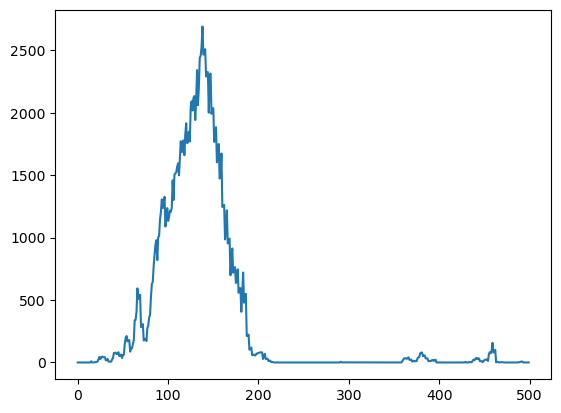

In [5]:
Dynamics.df_network_trajectory["securities reused tot. network"].plot()